### Computing a simple gradient with Numpy

Consider the function
$$
f(\mathbf{x}) = \frac{1}{2}x_1^2 + (x_2-1)^2
$$

The gradient of this function is
$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x}) \\
\frac{\partial f}{\partial x_2}(\mathbf{x}) \\
\end{bmatrix}
= \begin{bmatrix}
x_1 \\
2(x_2-1) \\
\end{bmatrix}
$$



In [2]:
def f(x):
    x1, x2 = x.T
    return 0.5*x1**2 + (x2-1)**2
    
def f_grad(x):
    x1, x2 = x.T
    grad = np.empty_like(x)
    grad[:,0] = x1
    grad[:,1] = 2*(x2 - 1)
    return grad.squeeze()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[3.5, 2.5], [-2.0, 0.5], [5.0, -3.0]])
y = f(x)
g = f_grad(x)

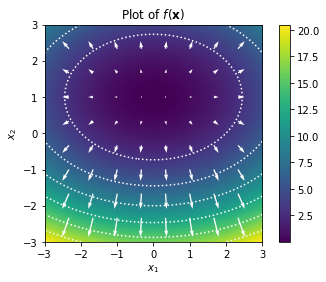

In [4]:
def eval_func_on_grid(func, gridsize):                
    steps = np.linspace(-3, 3, gridsize)              
    x1, x2 = np.meshgrid(steps, steps)                
    x = np.column_stack([x1.ravel(), x2.ravel()])     
    y = func(x)                                       
    y = y.reshape(gridsize, gridsize, -1).squeeze()   
    return x1, x2, y

def plot():
    x1, x2, y = eval_func_on_grid(f, 100)
    
    plt.imshow(y, origin='lower', extent=(x1.min(), x1.max(), x2.min(), x2.max()))
    plt.colorbar()

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Plot of $f(\\mathbf{x})$')
    plt.gca().set_aspect('equal') 
    
    plt.contour(x1, x2, y, colors='white', linestyles=':')
    x1, x2, grad = eval_func_on_grid(f_grad, 10)
    plt.quiver(x1, x2, grad[:,:,0], grad[:,:,1], color='white')
    
plot()

In [7]:
def gradient_descent_on_f(x_init, learn_rate, num_steps):
    x = x_init
    for i in range(num_steps):
        x = x - learn_rate*f_grad(x)
    return x

In [8]:
x = gradient_descent_on_f(np.array([[0, 1]]), 100.0, 1)
assert np.array_equal(x, [[0, 1]]), "Gradient descent shouldn't move away from optimal value!"
x = gradient_descent_on_f(np.array([[1, -2]]), 0.25, 1)
assert np.array_equal(x, [[0.75, -0.5]]), "The first gradient step seems to be wrong!"
x = gradient_descent_on_f(x, 0.1, 3)


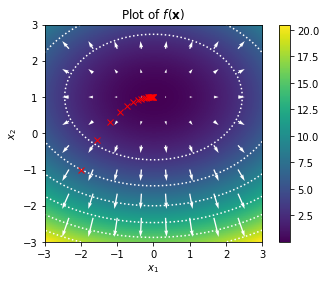

In [9]:
plot()
learn_rate = 0.05
x_init = np.array([[-2.0, -1.0]])                                
for num_steps in range(0, 100, 5):                               
    x = gradient_descent_on_f(x_init, learn_rate, num_steps)     
    plt.plot(*x[0], 'xr');                                       